# Pandas Operations

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [61]:
s = pd.Series([1,3,5,np.nan,6,8])
dates = pd.date_range('20230101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2023-01-01,-0.294209,-0.189724,0.036544,-0.275821
2023-01-02,-1.979432,1.864915,0.515142,-0.576457
2023-01-03,1.425054,0.197853,-0.197784,-1.353790
2023-01-04,0.117588,0.891957,0.677907,-1.593034
2023-01-05,0.811803,-0.646165,-0.547652,1.014269
2023-01-06,-1.101346,0.891044,0.702948,-0.999979


In [62]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20230101', periods=6))
df['F'] = s1
df

,A,B,C,D,F
2023-01-01,-0.294209,-0.189724,0.036544,-0.275821,1
2023-01-02,-1.979432,1.864915,0.515142,-0.576457,2
2023-01-03,1.425054,0.197853,-0.197784,-1.353790,3
2023-01-04,0.117588,0.891957,0.677907,-1.593034,4
2023-01-05,0.811803,-0.646165,-0.547652,1.014269,5
2023-01-06,-1.101346,0.891044,0.702948,-0.999979,6


In [63]:
df.mean()

A   -0.170090
B    0.501647
C    0.197851
D   -0.630802
F    3.500000
dtype: float64

In [64]:
#Same operation on the other axis
#df.mean(0)
df.mean(1)

2023-01-01    0.055358
2023-01-02    0.364834
2023-01-03    0.614266
2023-01-04    0.818884
2023-01-05    1.126451
2023-01-06    1.098534
Freq: D, dtype: float64

#Histogramming

In [65]:
 s = pd.Series(np.random.randint(0, 7, size=10))
 s

0    2
1    3
2    3
3    5
4    5
5    3
6    3
7    1
8    5
9    4
dtype: int64

In [66]:
s.value_counts()

3    4
5    3
2    1
1    1
4    1
dtype: int64

In [67]:
#String Methods
s1 = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'caT', 4])
s2=s1.str.lower()
s2

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
9     NaN
dtype: object

#Merge
concat

In [68]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.701314,0.436429,3.015424,-2.130245
1,-0.681104,-1.455901,0.519851,-0.790840
2,-1.134437,0.404632,-0.531279,0.502232
3,1.267247,0.485773,0.037578,-1.800203
4,0.606036,-0.168176,-0.587933,-1.121443
5,0.158766,0.333833,0.973486,-0.044346
6,1.525657,0.399711,0.115418,3.063095
7,-0.549150,1.108033,-0.243799,-0.629796
8,0.180663,1.660633,-0.583310,0.628245
9,0.884278,-0.493458,0.124561,-0.200273


In [69]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
#pieces[0]
#pieces[1]
pieces[2]

,0,1,2,3
7,-0.549150,1.108033,-0.243799,-0.629796
8,0.180663,1.660633,-0.583310,0.628245
9,0.884278,-0.493458,0.124561,-0.200273


In [70]:
df1=pd.concat(pieces)
df1

,0,1,2,3
0,-0.701314,0.436429,3.015424,-2.130245
1,-0.681104,-1.455901,0.519851,-0.790840
2,-1.134437,0.404632,-0.531279,0.502232
3,1.267247,0.485773,0.037578,-1.800203
4,0.606036,-0.168176,-0.587933,-1.121443
5,0.158766,0.333833,0.973486,-0.044346
6,1.525657,0.399711,0.115418,3.063095
7,-0.549150,1.108033,-0.243799,-0.629796
8,0.180663,1.660633,-0.583310,0.628245
9,0.884278,-0.493458,0.124561,-0.200273


In [71]:
#join
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [72]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [3, 4]})
right

,key,rval
0,foo,3
1,foo,4


In [73]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,3
1,foo,1,4
2,foo,2,3
3,foo,2,4


In [74]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [3, 4]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,3
1,bar,2,4


#Append

In [75]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.423923,-0.871541,0.821030,0.335557
1,-0.351282,0.166968,-0.673792,0.920981
2,-0.673051,-2.380839,0.845628,2.008910
3,0.173732,-0.125174,-0.043861,0.835203
4,-0.715284,1.036271,-0.187033,1.419516
5,0.150369,1.335718,-1.976395,0.858851
6,0.577064,0.258566,-1.337672,-0.056681
7,1.011026,-0.238705,-1.230551,-0.720110


In [76]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.423923,-0.871541,0.821030,0.335557
1,-0.351282,0.166968,-0.673792,0.920981
2,-0.673051,-2.380839,0.845628,2.008910
3,0.173732,-0.125174,-0.043861,0.835203
4,-0.715284,1.036271,-0.187033,1.419516
5,0.150369,1.335718,-1.976395,0.858851
6,0.577064,0.258566,-1.337672,-0.056681
7,1.011026,-0.238705,-1.230551,-0.720110
8,0.173732,-0.125174,-0.043861,0.835203


# Grouping
"group by" is a process involving one or more of the following steps

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [77]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
   'C' : np.random.randn(8),
   'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,0.030696,-1.482627
1,bar,one,2.002932,-1.020997
2,foo,two,0.734753,1.682603
3,bar,three,0.066476,-0.056699
4,foo,two,-0.666123,0.362635
5,bar,two,1.807942,0.715110
6,foo,one,-1.993052,1.017171
7,foo,three,0.591632,-0.517206


In [78]:
 df.groupby('A').sum()

,C,D
A,,
bar,3.877350,-0.362586
foo,-1.302094,1.062576


In [79]:
df.groupby('B').mean()

,C,D
B,,
one,0.013525,-0.495484
three,0.329054,-0.286953
two,0.625524,0.920116


In [80]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    2.002932 -1.020997
    three  0.066476 -0.056699
    two    1.807942  0.715110
foo one   -1.962356 -0.465456
    three  0.591632 -0.517206
    two    0.068630  2.045238

In [81]:
df.groupby(['A'], sort=False).sum()

,C,D
A,,
foo,-1.302094,1.062576
bar,3.877350,-0.362586


In [82]:
grouped = df.groupby(['A'])
grouped.groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [83]:
for name, group in grouped:
  print(name)
  print(group)

bar
     A      B         C         D
1  bar    one  2.002932 -1.020997
3  bar  three  0.066476 -0.056699
5  bar    two  1.807942  0.715110
foo
     A      B         C         D
0  foo    one  0.030696 -1.482627
2  foo    two  0.734753  1.682603
4  foo    two -0.666123  0.362635
6  foo    one -1.993052  1.017171
7  foo  three  0.591632 -0.517206


In [84]:
grouped.get_group('bar')

,A,B,C,D
1,bar,one,2.002932,-1.020997
3,bar,three,0.066476,-0.056699
5,bar,two,1.807942,0.715110


In [85]:
grouped.aggregate(np.sum)

,C,D
A,,
bar,3.877350,-0.362586
foo,-1.302094,1.062576


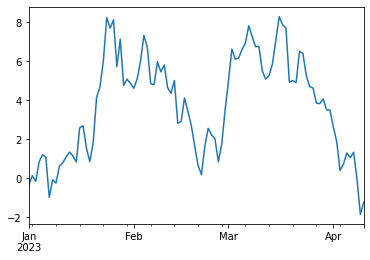

In [89]:
#plotting

ts = pd.Series(np.random.randn(100), index=pd.date_range("1/1/2023", periods=100))
ts = ts.cumsum()
ts.plot();

<Figure size 432x288 with 0 Axes>

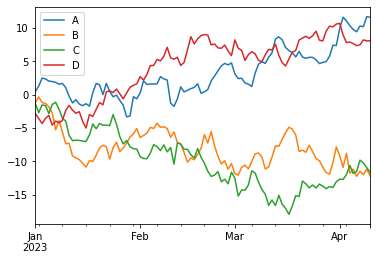

In [92]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
#df
plt.figure(); df.plot(); plt.legend(loc='best')